In [3]:
# Importing All the neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [5]:
# Creating a non-linear data

X = 6 * np.random.rand(200,1)-3
Y = 0.8 * X ** 2 + 0.9*X + 2 + np.random.randn(200,1)

In [7]:
X

array([[-2.3387461 ],
       [-1.02281488],
       [-1.76889091],
       [ 1.11667853],
       [ 1.12528282],
       [ 2.60787539],
       [ 2.40623075],
       [-0.07598371],
       [ 2.81903643],
       [-1.27021013],
       [-1.425047  ],
       [-2.14861045],
       [-1.43710308],
       [ 1.5528793 ],
       [-1.7375945 ],
       [ 1.25152018],
       [-1.07543364],
       [-0.78401582],
       [ 0.06322617],
       [-2.84902418],
       [-0.92183499],
       [-0.37089029],
       [ 2.10356767],
       [-2.72863091],
       [-2.76192778],
       [-0.36876967],
       [ 0.49660683],
       [ 0.47991959],
       [-2.69382674],
       [-1.5286507 ],
       [ 1.32406146],
       [-2.85563424],
       [ 2.84888993],
       [-2.76981709],
       [-2.75160298],
       [ 1.40177727],
       [-0.04547924],
       [-2.36962049],
       [ 0.16691452],
       [ 2.62801604],
       [ 2.85694044],
       [ 2.05690286],
       [ 2.13685851],
       [-0.11327262],
       [-1.58933537],
       [ 1

In [9]:
Y

array([[ 6.18094401],
       [ 0.97745408],
       [ 3.94539988],
       [ 4.38155808],
       [ 2.94596838],
       [10.78227141],
       [ 8.54539655],
       [ 2.31057498],
       [11.41028077],
       [ 3.25315281],
       [ 2.7811238 ],
       [ 4.96349339],
       [ 3.83897273],
       [ 4.86687191],
       [ 5.04380527],
       [ 3.08319985],
       [ 2.48574215],
       [ 2.335156  ],
       [ 1.54800339],
       [ 5.29677813],
       [ 1.76655644],
       [ 1.99213824],
       [ 7.03466612],
       [ 5.41156165],
       [ 4.85085674],
       [ 3.86922162],
       [ 1.53100013],
       [ 2.80732384],
       [ 4.70284945],
       [ 3.62820234],
       [ 4.54361938],
       [ 6.40597471],
       [11.51671045],
       [ 5.74602521],
       [ 5.79030784],
       [ 4.85978479],
       [ 2.73835886],
       [ 4.72552503],
       [ 2.01921695],
       [ 9.99138478],
       [11.61284492],
       [ 7.67984128],
       [ 7.91727905],
       [ 0.82912652],
       [ 3.15438229],
       [ 5

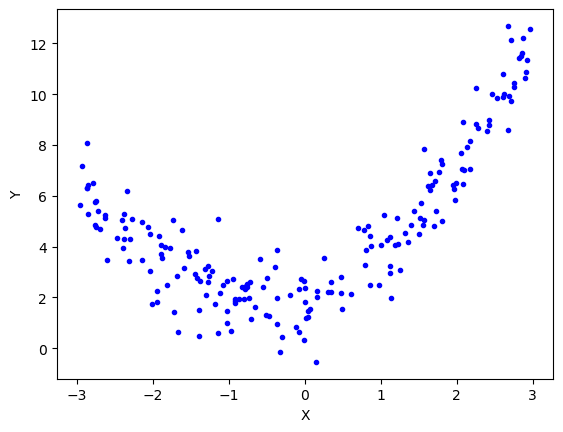

In [33]:
plt.scatter(X,Y, marker='.',color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [35]:
#Lets applyy normal linearRegression and check how does it perform on a non-linear data

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [49]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_test)

In [55]:
r2_score(y_test,y_pred)

-0.11838150134193492

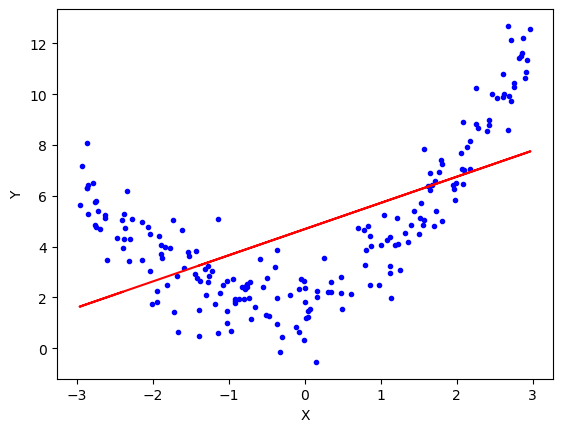

In [57]:
plt.plot(X_train,lr.predict(X_train),color='red')
plt.scatter(X,Y, marker='.',color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [59]:
# Lets apply polynomial Regression

poly = PolynomialFeatures(degree=2,include_bias=True)

In [61]:
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [69]:
X_train_trans[0]

array([ 1.        , -1.38864636,  1.9283387 ])

In [71]:
X_test_trans[0]

array([ 1.        , -1.68597774,  2.84252094])

In [73]:
lr2 = LinearRegression()

In [75]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [77]:
y_pred2 = lr.predict(X_test_trans)

In [79]:
r2_score(y_test,y_pred2)

0.6565194670160766

In [83]:
lr.coef_

array([[0.        , 0.92513567, 0.83542224]])

In [85]:
lr.intercept_

array([1.99881208])

In [87]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new =  lr.predict(X_new_poly)

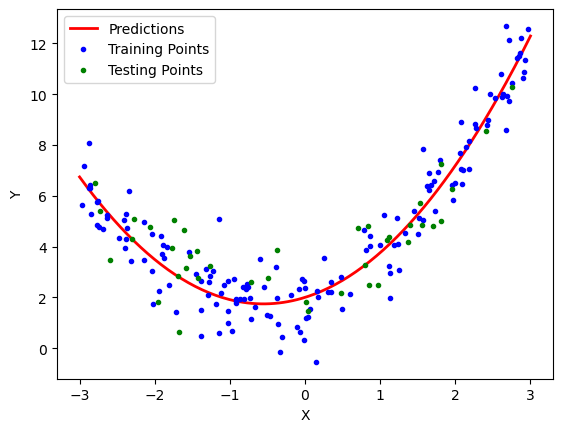

In [91]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,y_train,"b.",label="Training Points")
plt.plot(X_test,y_test,"g.",label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()